 # Task : Prediction using Unsupervised Machine learning

#### From the given 'Iris' dataset ,predict the optimum number of clusters and represent it visually

###### Starting by importing all the required libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

###### Reading the dataset provided

In [7]:
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### To get all the other information about the dataset 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### for other statistical information

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.shape

(150, 6)

#### Data Preprocessing

In [13]:
x=df.drop(['Id','Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### PLOTING THE SCATTER PLOT TO SEE HOW THE DATA IS SPREAD

<Axes: >

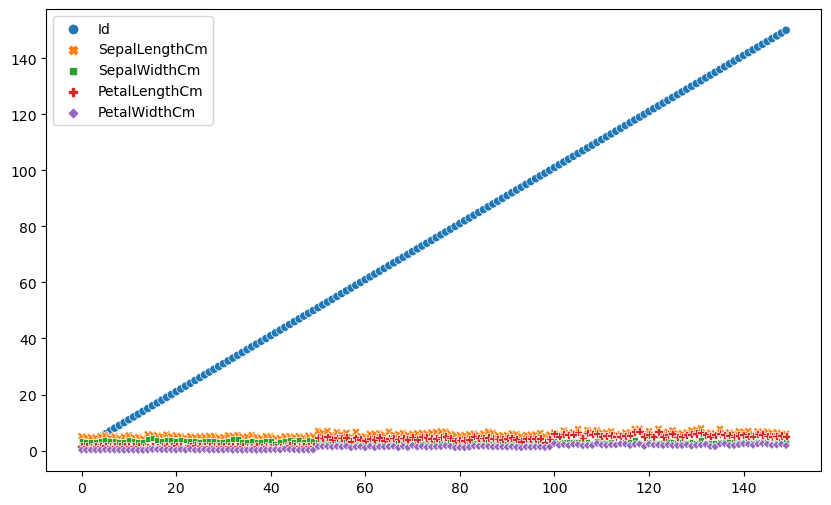

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df)

#### BY USING BOXPLOT WE CAN ANALYSE ABOUT THE OUTLIERS

<Axes: >

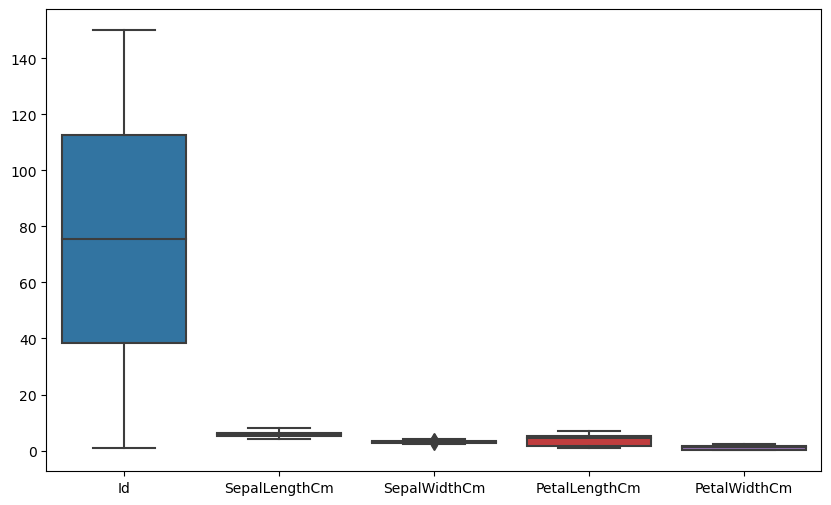

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

#### HISTOGRAM TO SHOW THE SUMMARY OF THE DATASET

<Axes: ylabel='Count'>

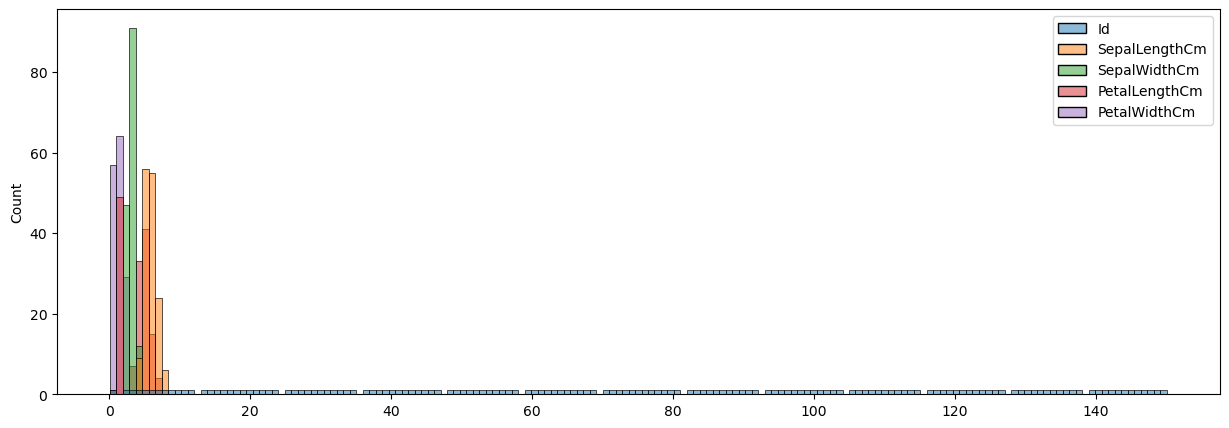

In [25]:
plt.figure(figsize=(15,5))
sns.histplot(df)

## K Means Clustering

#### K means Clustering algorithm identifies k number of centriods and then alloctae every data point to the nearest cluster,while keeping  the centriods as close as possible. 

In [42]:
x = df.iloc[:, [0,1,2,3]].values

### Elbow method runs K mean clustering on a dataset on k number of values and then each values of k computes an average score for all clusters.

In [52]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[281831.5446666667,
 70581.38080000003,
 31320.71120000001,
 17791.08370597318,
 11423.964757508344,
 7897.511987179487,
 5907.7698281276325,
 4551.0427573099405,
 3580.4503333333337]

Text(0, 0.5, 'Within Clusters sum of squares')

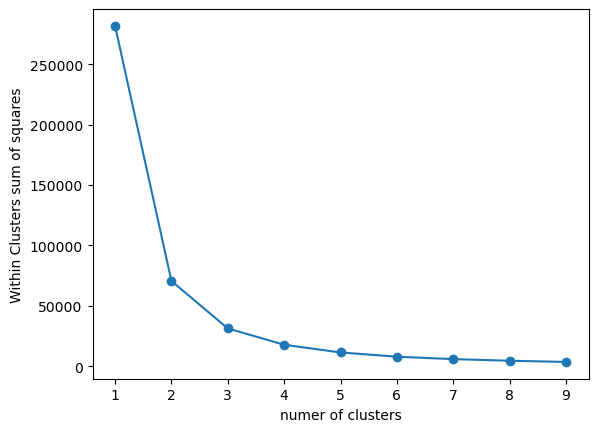

In [53]:
nu_clusters=range(1,10)
plt.plot(nu_clusters,wcss,'o-')
plt.xlabel('numer of clusters')
plt.ylabel('Within Clusters sum of squares')

#### From the above graph it is clear that  elbow is at 3 so there wil be three clusters. 

In [ ]:
kmeans= KMeans(n_clusters=3,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

## Clusters

In [57]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Visualisation of Clusters

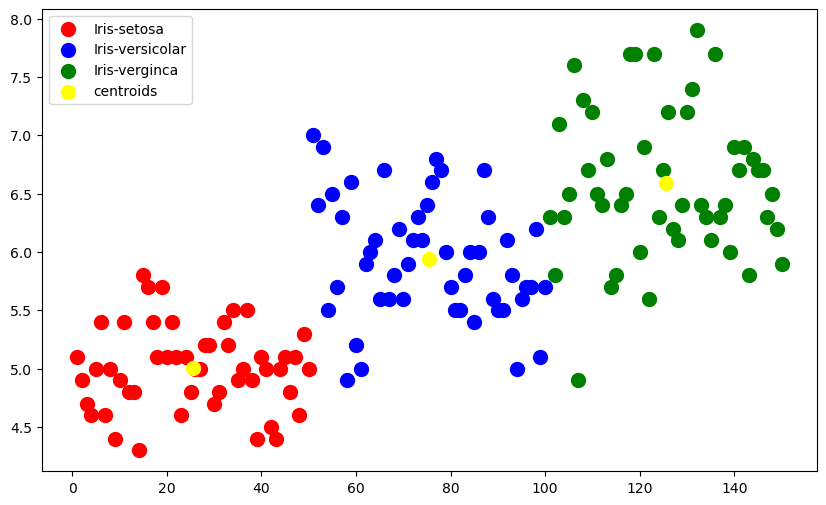

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100,c='blue',label='Iris-versicolar')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100,c='green',label='Iris-verginca')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='centroids')
plt.legend()